社會網路分析<br/>
參考教科書：大數據分析: 連結與網路<br/>
資料來源：https://github.com/pablobarbera/data-science-workshop

# 資料準備與探索

In [2]:
# 讀取資料
starwars_edges = read.csv("D:/Code practice/R/20220117/DATA/star-wars-network-edges.csv")

In [3]:
str(starwars_edges)

'data.frame':	60 obs. of  3 variables:
 $ source: Factor w/ 15 levels "BERU","BIGGS",..: 3 12 14 11 10 5 7 5 3 5 ...
 $ target: Factor w/ 18 levels "C-3PO","CAMIE",..: 14 14 14 14 14 14 14 12 3 10 ...
 $ weight: int  17 13 6 5 5 3 1 7 5 16 ...


In [4]:
head(starwars_edges)

source,target,weight
C-3PO,R2-D2,17
LUKE,R2-D2,13
OBI-WAN,R2-D2,6
LEIA,R2-D2,5
HAN,R2-D2,5
CHEWBACCA,R2-D2,3


# 模型建立

In [5]:
# 安裝套件 ggplot，並引入
# install.packages("igraph")
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [6]:
# 轉成圖形格式
g <- graph_from_data_frame(d=starwars_edges, directed = FALSE)
g

IGRAPH 1e8af07 UNW- 21 60 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 1e8af07 (vertex names):
 [1] C-3PO    --R2-D2       LUKE     --R2-D2       OBI-WAN  --R2-D2      
 [4] LEIA     --R2-D2       HAN      --R2-D2       CHEWBACCA--R2-D2      
 [7] DODONNA  --R2-D2       OBI-WAN  --CHEWBACCA   C-3PO    --CHEWBACCA  
[10] LUKE     --CHEWBACCA   HAN      --CHEWBACCA   LEIA     --CHEWBACCA  
[13] CHEWBACCA--DARTH VADER CHEWBACCA--DODONNA     LUKE     --CAMIE      
[16] CAMIE    --BIGGS       LUKE     --BIGGS       LEIA     --DARTH VADER
[19] LUKE     --BERU        BERU     --OWEN        C-3PO    --BERU       
[22] LUKE     --OWEN        C-3PO    --LUKE        C-3PO    --OWEN       
+ ... omitted several edges

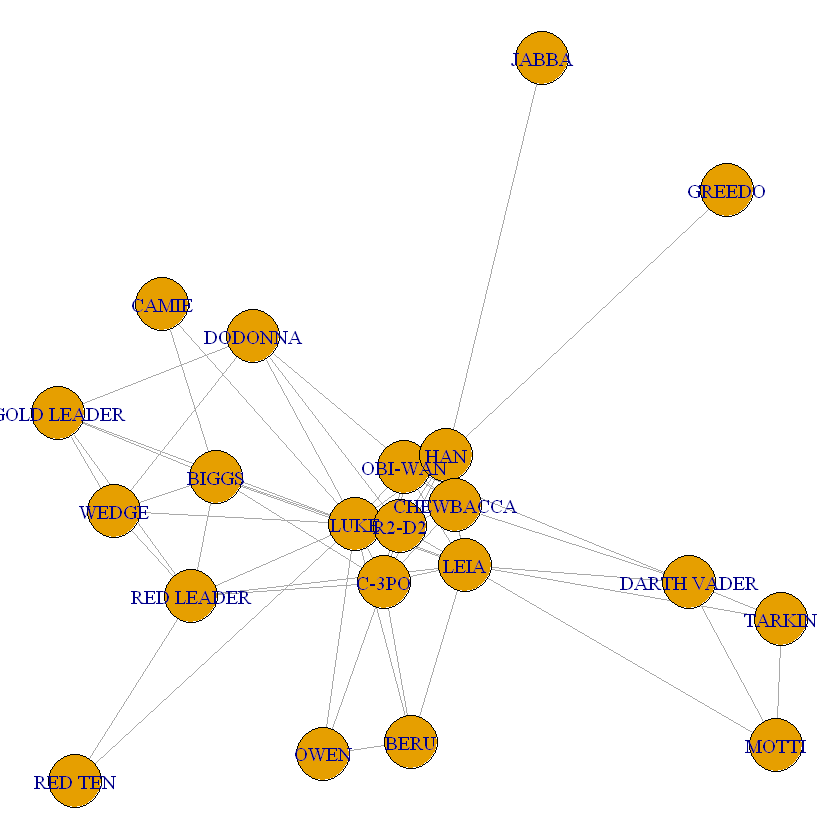

In [7]:
par(mar=c(0,0,0,0))
plot(g)

# 模型分析

In [8]:
# 連結程度: 衡量節點與其他節點的程度
tail(sort(degree(g)))

R2-D2       HAN CHEWBACCA     C-3PO      LEIA      LUKE 
        7         8         8        10        12        15

In [9]:
# 強度: 衡量節點連結到其他節點的權重強度
tail(sort(strength(g)))

R2-D2      LEIA CHEWBACCA     C-3PO       HAN      LUKE 
       50        59        63        64        80       129

In [10]:
# 緊密度: 衡量節點連結到其他節點的容易程度
tail(sort(closeness(g, normalized = TRUE)))

C-3PO        LUKE  RED LEADER     DODONNA GOLD LEADER       BIGGS 
  0.2985075   0.3030303   0.3174603   0.3225806   0.3278689   0.3389831

In [11]:
# 中介度: 衡量節點具有中介地位，可以連結到不同節點
tail(sort(betweenness(g)))

RED LEADER      BIGGS      C-3PO        HAN    DODONNA       LEIA 
  31.41667   31.91667   32.78333   37.00000   47.53333   59.95000

# 模型分析-群組

In [12]:
# 連結程度: 衡量節點與其他節點的程度
# 子群組
comm <- cluster_infomap(g)
comm

IGRAPH clustering infomap, groups: 2, mod: 0.064
+ groups:
  $`1`
   [1] "C-3PO"       "LUKE"        "OBI-WAN"     "LEIA"        "HAN"        
   [6] "CHEWBACCA"   "DODONNA"     "CAMIE"       "BIGGS"       "BERU"       
  [11] "GREEDO"      "GOLD LEADER" "RED LEADER"  "R2-D2"       "OWEN"       
  [16] "JABBA"       "WEDGE"       "RED TEN"    
  
  $`2`
  [1] "DARTH VADER" "MOTTI"       "TARKIN"     
  

In [13]:
# 計算核心子群組
coreness(g)
table(coreness(g))
which(coreness(g)==6)

C-3PO        LUKE     OBI-WAN        LEIA         HAN   CHEWBACCA 
          6           6           6           6           6           6 
    DODONNA       CAMIE       BIGGS DARTH VADER        BERU       MOTTI 
          5           2           5           3           3           3 
     GREEDO GOLD LEADER  RED LEADER       R2-D2        OWEN      TARKIN 
          1           5           5           6           3           3 
      JABBA       WEDGE     RED TEN 
          1           5           2


1 2 3 5 6 
2 2 5 5 7 

C-3PO      LUKE   OBI-WAN      LEIA       HAN CHEWBACCA     R2-D2 
        1         2         3         4         5         6        16

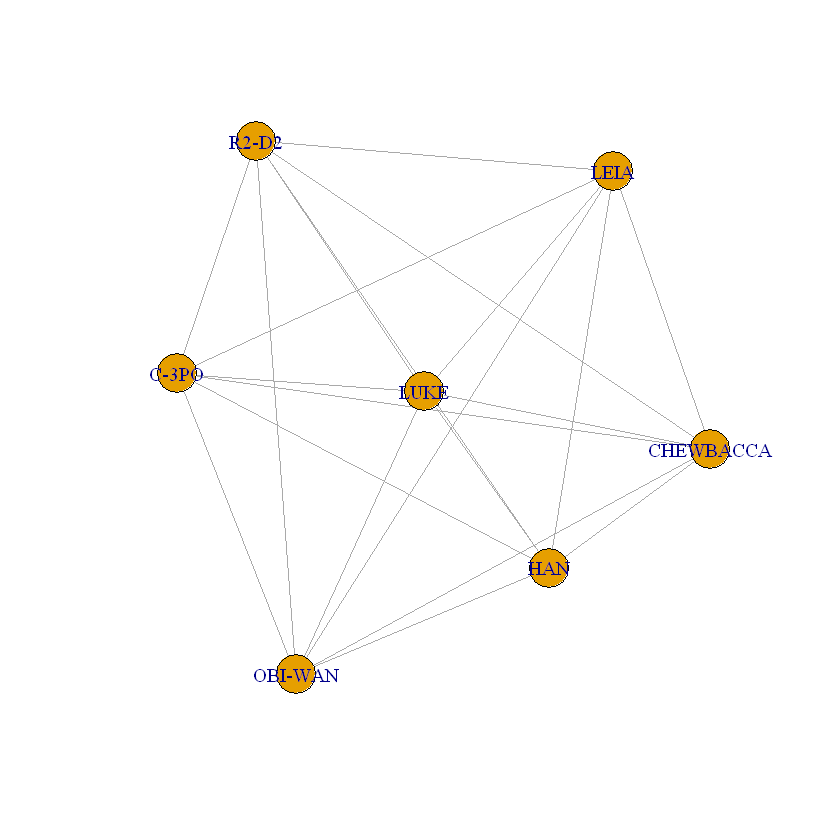

In [14]:
# 繪製核心群組，以LUKE為中心
core <- induced_subgraph(g, v=which(coreness(g) == 6))
plot(core)